<a href="https://colab.research.google.com/github/ouguro3/Study/blob/main/03_guess_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 추측 통계

일부 데이터로부터 전체 데이터의 통계적 성질을 추측하는 방식

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [ ]:
df = pd.read_csv('./ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

### 모집단과 표본

추측하고 싶은 관측 대상 전체 : `모집단` (`population`)  

추측에 사용하는 관측 대상의 일부분 : `표본` (`sample`)

모집단에서 표본을 골라내는 일 : `표본 추출` (`sampling`)  

골라낸 표본의 수 : `표본 크기`, `샘플 사이즈`  

표본을 바탕으로 계산한 평균, 분산, 상관계수 등 : `표본 통계량`  

모집단의 평균, 분산, 상관계수 등 : `모수`

표본의 평균을 `표본평균`, 모집단의 평균을 `모평균` 으로 부르는 경우도 있다

표본평균으로 모평균을 추측할 때 표본평균은 모평균의 `추정량 (estimator)` , 

실제 표본의 데이터를 이용하여 계산한 결과를 `추정값 (estimate)` 이라고 한다

#### 표본추출 방법

임의로 표본을 추출하는 `무작위추출 (random sampling)`,  

여러 차례 동일한 표본을 선택하는 `복원추출 (sampling with replacement)`,  

동일한 표본은 한 번만 선택하는 `비복원추출 (sampling without replacement)`

In [ ]:
# 무작위 추출 np.random.choice

# 1,2,3 이라는 리스트에서 표본 크기 3으로
np.random.choice([1,2,3],3)

array([3, 1, 1])

기본적으로 1,2,3 중 랜덤 추출 된다

In [ ]:
# 비복원 추출 np.random.choice의 인수 `replace` 를 `False` 로

np.random.choice([1,2,3],3, replace=False)

array([1, 2, 3])

매번 중복되지 않고 1,2,3 이라는 숫자가 한 번씩 추출된다

매번 동일한 난수를 얻으려면 난수 `시드 (seed)`를 도입한다

In [ ]:
# 1,2,1 결과 얻기

# 시드를 0으로 도입
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

무작위추출에 대해 시드를 0으로 설정한 다음, scores로부터 표본크기 20으로 복원 추출해 표본평균 구하기

In [ ]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

모평균 구하기

In [ ]:
scores.mean()

69.530

무작위추출은 매번 결과가 달라지기 때문에, 얻어진 표본평균도 매번 다르다  

무작위추출과 그 값의 표본평균을 반복 실행해보면

In [ ]:
for i in range(5):
  sample = np.random.choice(scores, 20)
  print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 63.7
2번째 무작위추출로 얻은 표본평균 66.05
3번째 무작위추출로 얻은 표본평균 71.7
4번째 무작위추출로 얻은 표본평균 74.15
5번째 무작위추출로 얻은 표본평균 70.7


표본평균이 70.4 이니 꽤 괜찮은 결과로 보인다  
무작위로 추출한 값의 평균이 전부 70점 전후로 나름대로 산포도도 나타내고 있다

### 확률 모형

무작위추출은 임의로 표본을 선택하는 것이므로, 매번 결과가 다르게 나온다  

이런 불확정성을 수반한 현상을 해석하기 위해 `확률` 을 사용한다  

확률을 사용한 무작위추출, 혹은 주사위를 모델링한 것을 `확률 모형` 이라고한다

#### 확률의 기본

결과를 알아맞힐 수는 없지만,  
취하는 값과 그 값이 나올 확률이 결정되어 있는 것을 `확률 변수 (random variable)`  

확률변수의 결과를 관측하는 것을 `시행 (trial)`  

시행에 의해 관측되는 값을 `실현값 (realization)`  

시행 결과로 나타날 수 있는 일 `사건 (event)`  

더이상 세부적으로 분해할 수 없는 사건 `근원 사건 (elemetary event)`  

각 사건이 동시에는 일어날 수 없다는 `상호배반 (mutually exclusive)`

#### 확률분포

`확률분포` 란 확률변수가 어떻게 움직이는지를 나타낸것  

전체 확률이 1인 확률변수가 취할 수 있는 값이 어떻게 분포하고 있는지 나타낸다

In [ ]:
# 불공정한 주사위의 확률분포
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

확률변수를 사용할 때 np.random.choice 함수 사용이 가능하다  

인수 `p` 에 prob을 넘겨주는것으로 각 확률을 지정한다

In [ ]:
np.random.choice(dice, p=prob)

5

In [ ]:
# 100번 실행

num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6, 6, 3, 5, 5, 5, 3, 6, 4, 6, 5, 4,
       6, 4, 6, 5, 6, 5, 6, 5, 6, 5, 4, 5, 1, 4, 5, 4, 5, 4, 2, 4, 5, 5,
       5, 5, 5, 4, 6, 4, 4, 6, 6, 5, 2, 6, 5, 6, 3, 6, 3, 5, 2, 6, 6, 5,
       4, 2, 5, 4, 6, 6, 6, 6, 1, 4, 6, 3, 5, 2, 3, 1, 6, 3, 4, 6, 5, 1,
       3, 5, 5, 3, 6, 5, 5, 5, 6, 4, 4, 3])

In [ ]:
# 도수분포표 작성

freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
             index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,6,0.06
2,6,0.06
3,12,0.12
4,18,0.18
5,30,0.30
6,28,0.28


각 눈이 나온 횟수와 비율을 알 수 있다

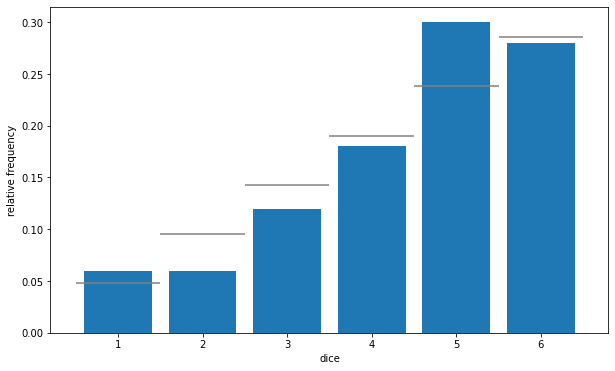

In [ ]:
# 히스토그램

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2,8),colors = 'gray')
# 막대그래프의 [1.5, 2.5, ...., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5, 6))
# 주사위의 눈 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

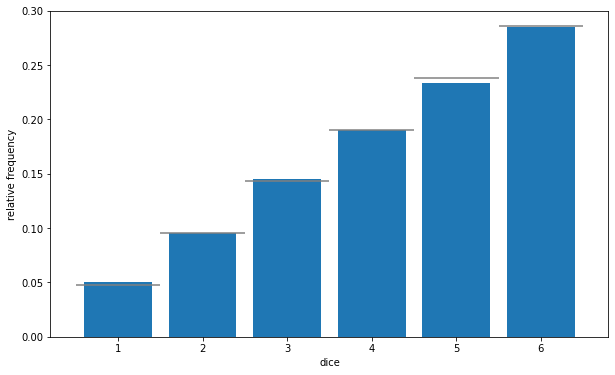

In [ ]:
# 시행횟수 10000번으로 늘려서 다시 실행
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2,8),colors = 'gray')
ax.set_xticks(np.linspace(1.5,6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

상대도수가 실제 확률분포에 가까워졌다  

시행횟수를 늘림면 상대도수는 확률분포로 수렴되어 간다

### 추측통계의 확률